In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#loading iris csv from local system 
iris_df = pd.read_csv(r"C:\Users\Aakash\Desktop\Data Analysis\IRIS_dataset\iris.csv")
iris_df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
132,133,6.4,2.8,5.6,2.2,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica
68,69,6.2,2.2,4.5,1.5,Iris-versicolor


In [25]:
#checking data-points
iris_df.shape

(150, 6)

In [4]:
#checking column names
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
#checking each data points for flowers in species category
iris_df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#### Above data points shows that Iris dataset is balance dataset

# 2-D Scatter Plot
    It is used to identify the relationship between two variables

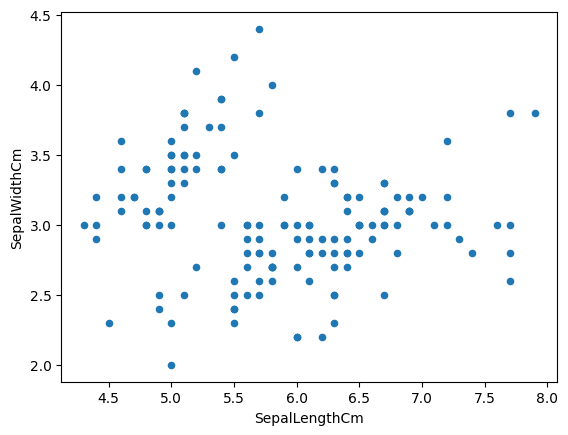

In [6]:
iris_df.plot(kind='scatter', x = 'SepalLengthCm', y = 'SepalWidthCm')
plt.show()

Above plot doesn't able to simplify the data for different flowers.
To overcome, Seaborn will be use for color coding.

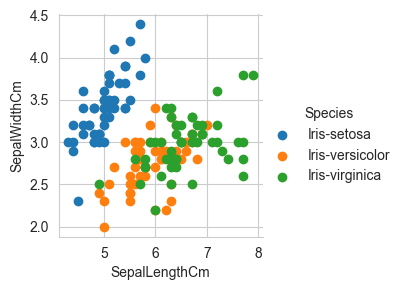

In [7]:
sns.set_style('whitegrid')
sns.FacetGrid(iris_df, hue='Species') \
   .map(plt.scatter, "SepalLengthCm","SepalWidthCm") \
    .add_legend()

plt.show()

Linearly Separable = It is clearly visible that Iris-setosa(blue color) is totally separated.

But Iris-versicolor(orange) and Iris-virginica(Green) are not separated, so we can draw multiple 2-D scatter plot for separation.

# PairPlot - allows us to plot pairwise relationships between variables within a dataset
    
       Total combination could be is 4C2 =6

In [8]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

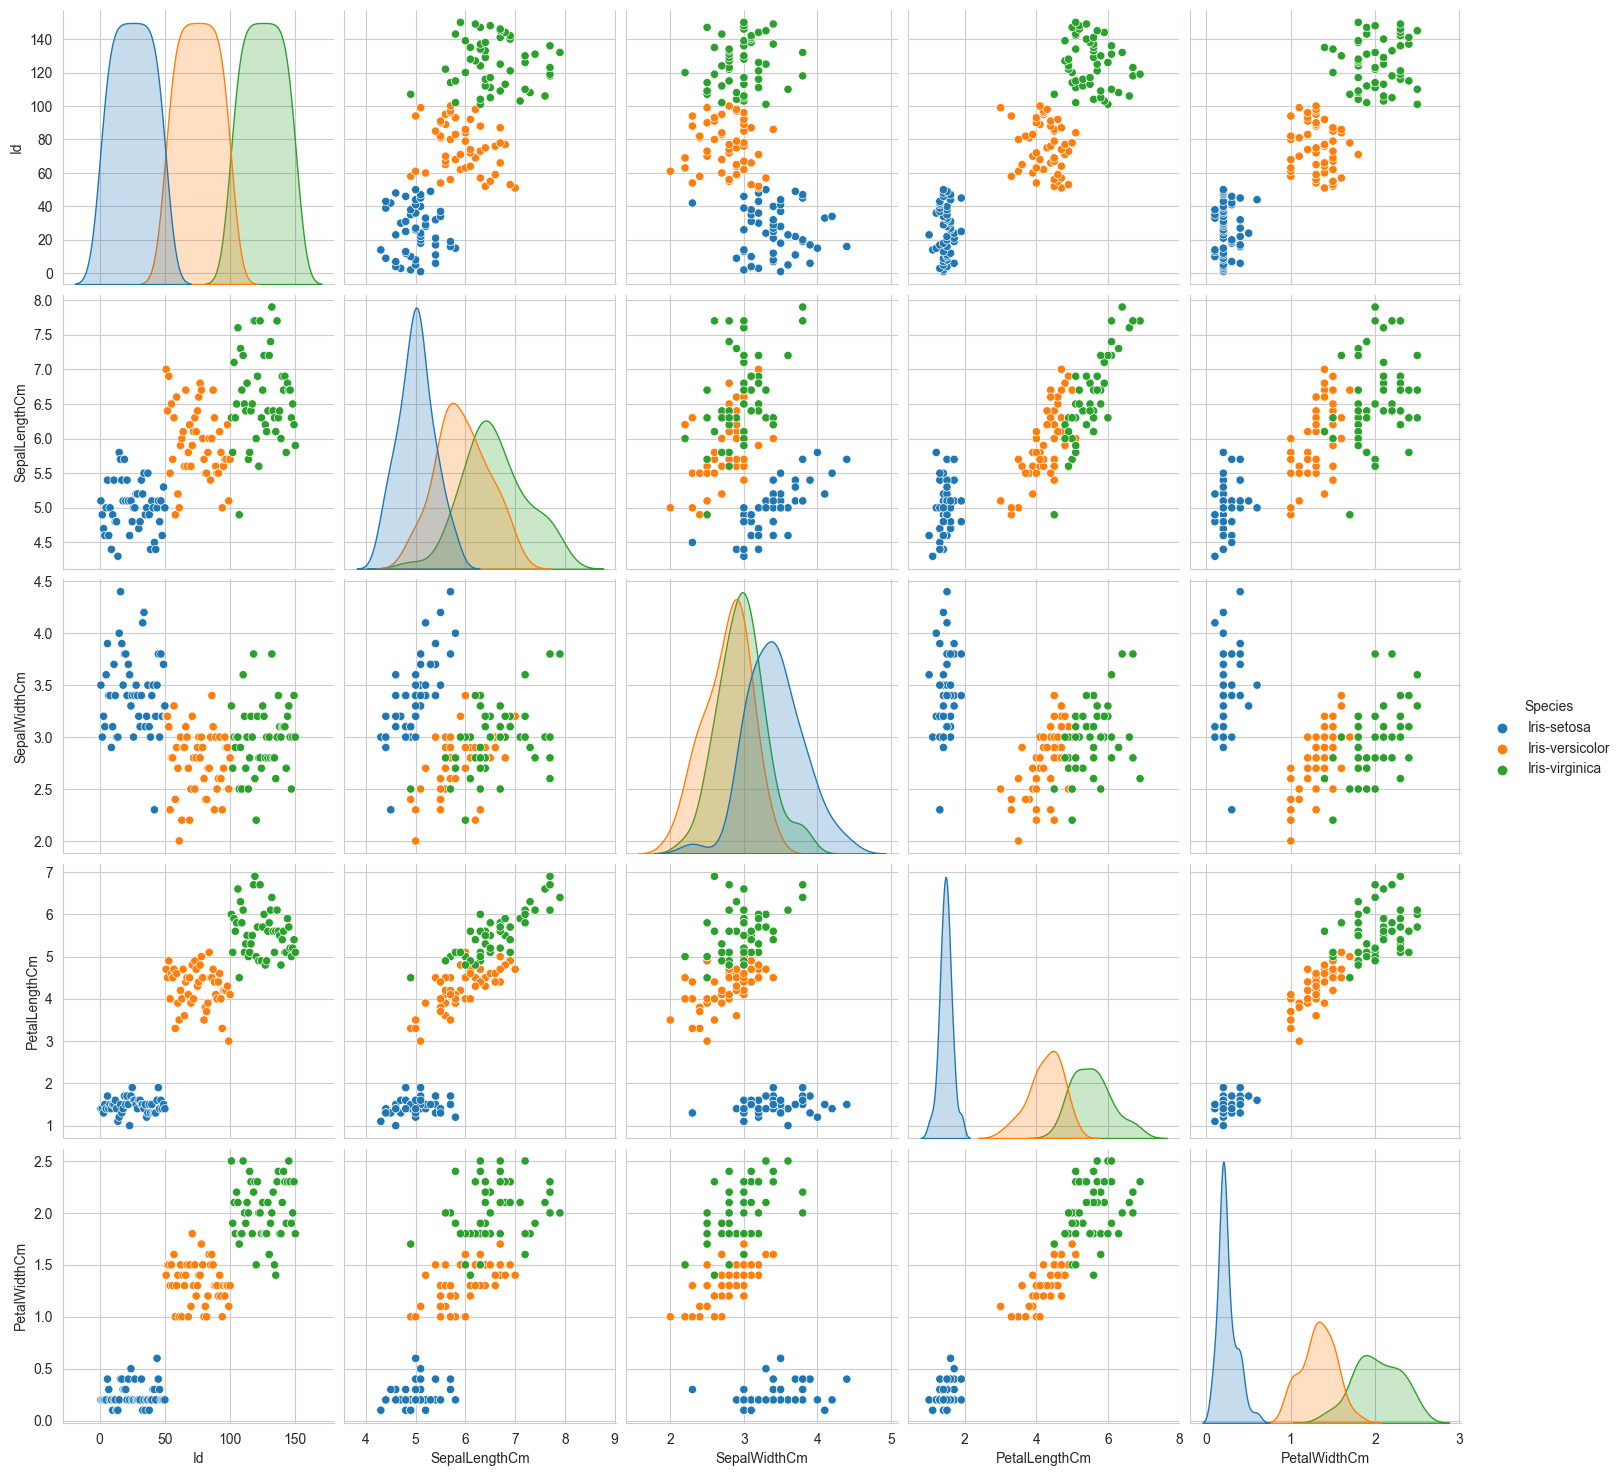

In [23]:
sns.set_style("whitegrid")
sns.pairplot(iris_df, hue='Species', height = 3)
plt.show()


# According to Pairplot
    1. PetalLength and PetalWidth are easily identify various types of flower.
    2. While Setosa can be easily identify (Linearly Separable) , Versicolo and Virnica have some overlap (almost Linearly   Separable).

# Histogram, PDF

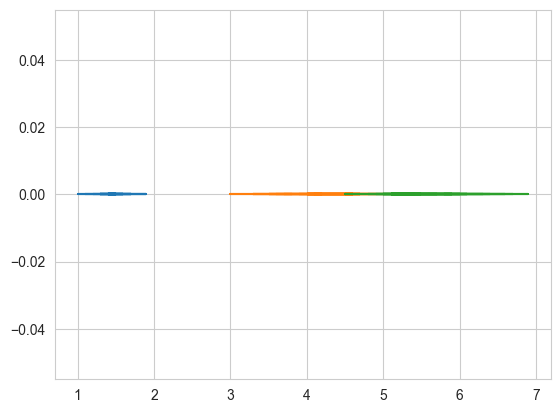

In [10]:
# 1-D scatter plot of petal length
iris_setosa = iris_df.loc[iris_df['Species'] == 'Iris-setosa']
iris_virginica = iris_df.loc[iris_df['Species'] == 'Iris-virginica']
iris_versicolor = iris_df.loc[iris_df['Species'] == 'Iris-versicolor']

#printing iris_setosa_petal length
plt.plot(iris_setosa["PetalLengthCm"], np.zeros_like(iris_setosa['PetalLengthCm']))
plt.plot(iris_versicolor["PetalLengthCm"], np.zeros_like(iris_versicolor['PetalLengthCm']))
plt.plot(iris_virginica["PetalLengthCm"], np.zeros_like(iris_virginica['PetalLengthCm']))

plt.show()

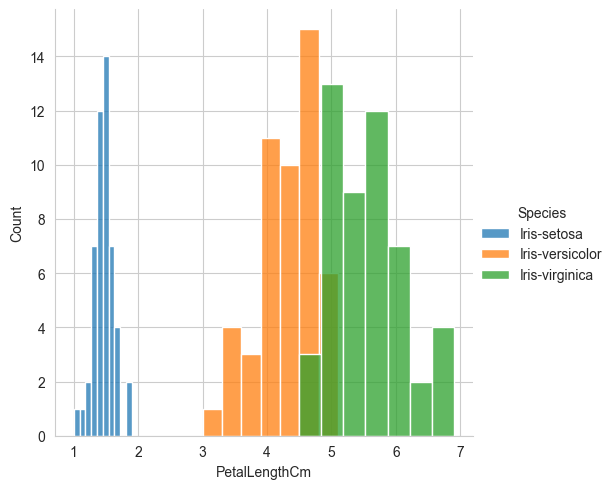

In [11]:

sns.FacetGrid(iris_df, hue='Species', height = 5) \
   .map(sns.histplot, "PetalLengthCm") \
    .add_legend()

plt.show()

# Univariate anlysis :- 1 variable analysis

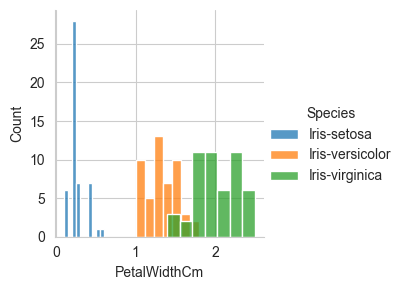

In [12]:
sns.FacetGrid(iris_df, hue='Species', height = 3) \
   .map(sns.histplot, "PetalWidthCm") \
    .add_legend()

plt.show()

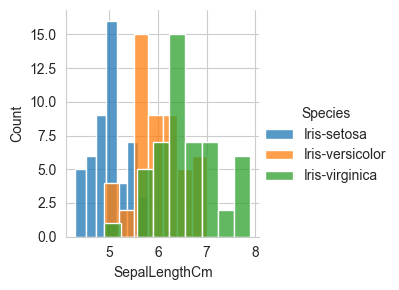

In [13]:
sns.FacetGrid(iris_df, hue='Species', height = 3) \
   .map(sns.histplot, "SepalLengthCm") \
    .add_legend()

plt.show()

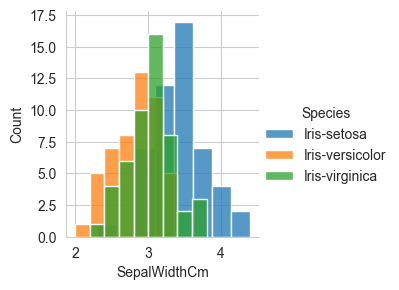

In [14]:
sns.FacetGrid(iris_df, hue='Species', height = 3) \
   .map(sns.histplot, "SepalWidthCm") \
    .add_legend()

plt.show()

According to 4 different features it concludes that :- PL>PD>>SL>>SW

# Cumulative Distribution Function (CDF)
    - gives the probability that the random variable X is less than or equal to x and is usually denoted F(x) . 
    - The cumulative distribution function of a random variable X is the function given by F(x)=P[X≤x].

In [15]:
#plotting CDF of petalLength because it is the best feature we find out

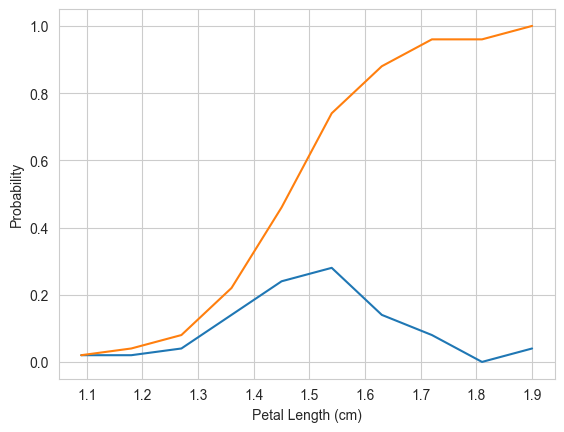

In [16]:
counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins = 10, density = True)

pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)

#computing CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Probability')

plt.show()

 Blue Line shows PDF and Orange shows CDF
 
 It states that :-
     - We can say that there are approc 82% of setosa flower that have PetalLengthCM <= 1.6CM
        - Also we can say for PetalLengthCM <= 1.3 && 1.9cm
     

# Trying to find out more accuracy for each flower (Misclassification Error)

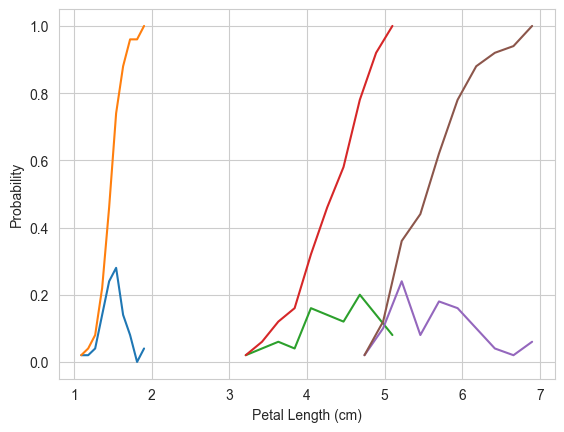

In [17]:
#SETOSA
counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins = 10, density = True)

pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)

#computing CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#plt.xlabel('Setosa Petal Length (cm)')
#plt.ylabel('Probability')


#VERSICOLOR
counts, bin_edges = np.histogram(iris_versicolor['PetalLengthCm'], bins = 10, density = True)

pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)

#computing CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#plt.xlabel('Versicolor Petal Length (cm)')
#plt.ylabel('Probability')


#VIRGINICA
counts, bin_edges = np.histogram(iris_virginica['PetalLengthCm'], bins = 10, density = True)

pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)

#computing CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#plt.xlabel('Virginica Petal Length (cm)')
#plt.ylabel('Probability')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Probability')

plt.show()

->Blue line - Setosa PL (100% Accurate)||
->Green line - Versicolor PL (95% Accurate, 5% of Error because of some participation of Virginica data) || 
->Purple line - Virginica (90% Accurate, 10% of Error because of some participation of Versicolor data at point 0.10 at Yaxis)

# Mean, Standard Deviation

In [18]:
#Printing mean - its a central tendency

print("Mean :- ")
print(np.mean(iris_setosa["PetalLengthCm"]))
print(np.mean(iris_versicolor["PetalLengthCm"]))
print(np.mean(iris_virginica["PetalLengthCm"]))

print("\nStandard Deviation :- ")
print(np.std(iris_setosa["PetalLengthCm"]))
print(np.std(iris_versicolor["PetalLengthCm"]))
print(np.std(iris_virginica["PetalLengthCm"]))


Mean :- 
1.464
4.26
5.5520000000000005

Standard Deviation :- 
0.17176728442867115
0.4651881339845204
0.5463478745268441


# Median, Percentile, Quantile, IQR, MAD

In [19]:
print("Median :-")
print(np.median(iris_setosa["PetalLengthCm"]))
print(np.median(iris_versicolor["PetalLengthCm"]))
print(np.median(iris_virginica["PetalLengthCm"]))

Median :-
1.5
4.35
5.55


In [20]:
print("Quantile :-")
print(np.percentile(iris_setosa["PetalLengthCm"], np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["PetalLengthCm"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["PetalLengthCm"],np.arange(0, 100, 25)))

Quantile :-
[1.    1.4   1.5   1.575]
[3.   4.   4.35 4.6 ]
[4.5   5.1   5.55  5.875]


In [21]:
print("90th Percentile :-")
print(np.percentile(iris_setosa["PetalLengthCm"],90))
print(np.percentile(iris_versicolor["PetalLengthCm"],90))
print(np.percentile(iris_virginica["PetalLengthCm"],90))

90th Percentile :-
1.7
4.8
6.31


# Median ABsolute Deviation
    - It is a particularly helpful measure because it is less affected by outliers than other measures such as variance. 
    - This is  what makes the measure robust, meaning that it has good performance for drawing data.
    
    - Formula 
            MAD = median(|Xi - bar(X)|)

In [27]:
#NP doesnt contain MAD function so for that we need to import 
from statsmodels import robust
print("Median Absolute Deviation")

print(robust.mad(iris_setosa["PetalLengthCm"]))
print(robust.mad(iris_versicolor["PetalLengthCm"]))
print(robust.mad(iris_virginica["PetalLengthCm"]))


Median Absolute Deviation
0.14826022185056031
0.5189107764769602
0.6671709983275211


In [28]:
#IQR = Inner Quartile Range  - it gives total difference betweeen different quartile range

# Box Plot and whiskers

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

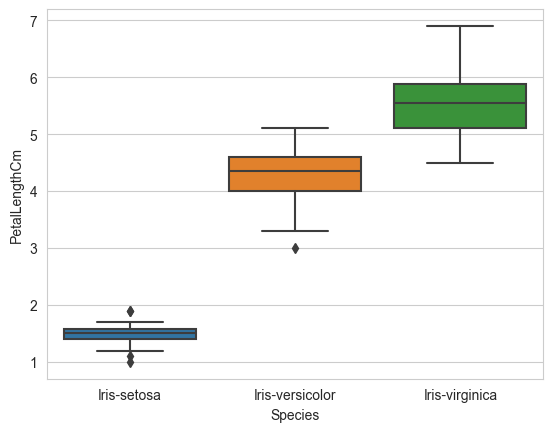

In [34]:
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = iris_df)

In [36]:
#Boxplot - It shows 25,50,75 IQR value.

# Whiskers = it shows min & max value in box plot
# calculation done = 1.5 * IQR